<strong>Developer Name:</strong> Muhammad Ahmed Javed

## 🔗 Links
[![portfolio](https://img.shields.io/badge/my_portfolio-000?style=for-the-badge&logo=ko-fi&logoColor=white)](http://datascienceportfol.io/Muhammad_Ahmed_Javed)

[![linkedin](https://img.shields.io/badge/linkedin-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](http://www.linkedin.com/in/%20muhammad-ahmed-javedb33900247)


---

### Navigation


- [1. Setup & Libraries](#setup)
- [2. Load Dataset](#load-dataset)
- [3. Data Preprocessing](#data-preprocessing)
- [4. Deep Learning Models Training](#model-training)
- [5. Models Evaluation](#model-evaluation)

---

<a name="setup"></a>
## 1. Setup & Libraries

---

In [ ]:

!pip install dagshub streamlit pydub pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.4 MB/s et

In [ ]:
import dagshub.colab
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as StandardScalar
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten,LSTM
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tabulate import tabulate
from pyngrok import ngrok

In [ ]:
repo=dagshub.colab.login()

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=a71eeb45-288a-4924-8e29-b95a136a243f&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=d70c2ac7f78d92ca2902111e930400f01fef8e973f5038a72bd706b0b772ca9e&referrer=colab




Accessing as AJSTYLE-lab

Repository AJSTYLE-lab/dagshub-drive is ready for use with Colab. Link to the repository:
https://dagshub.com/AJSTYLE-lab/dagshub-drive


In [ ]:
path=dagshub.storage.mount('Omdena/BangladeshChapter_AudioShield')

Do you want to install all missing packages?
Are you sure [y/(N)]: y


Installing rclone...

rclone installed successfully.

Installing fusermount3...

fusermount3 installed successfully.

Successfully mounted DagsHub Storage in 'BangladeshChapter_AudioShield' to 
'BangladeshChapter_AudioShield/dagshub_storage'.

To unmount, run `dagshub.storage.unmount(repo="Omdena/BangladeshChapter_AudioShield", 
path="BangladeshChapter_AudioShield/dagshub_storage")`.

<a name="load-dataset"></a>
## 2. Load Dataset

---

Protocol Files(Meta Data):

---

In [ ]:
def load_protocol(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)
    df.columns = ['speaker_id', 'audio_file_name', 'system_id', '-', 'key']
    return df
train_protocol = load_protocol('/content/BangladeshChapter_AudioShield/dagshub_storage/data/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt')
dev_protocol = load_protocol('/content/BangladeshChapter_AudioShield/dagshub_storage/data/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt')
eval_protocol = load_protocol('/content/BangladeshChapter_AudioShield/dagshub_storage/data/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt')
#----------------------------------------------------------
combined_protocol=pd.concat([train_protocol,dev_protocol])
combined_protocol=combined_protocol[:1000]
combined_protocol=pd.concat([train_protocol,dev_protocol])
combined_protocol=combined_protocol[:1000]
eval_protocol=eval_protocol[:1000]
#----------------------------------------------------------
# ANSI escape code for bold text
bold_start = '\033[1m'
bold_end = '\033[0m'
print(f'{bold_start}Training Protocol (Meta Data):{bold_end}\n{train_protocol.head(3)}')
print(f'{bold_start}Evaluation Protocol (Meta Data):{bold_end}\n{eval_protocol.head(3)}')

In [ ]:
bonafide_df = train_protocol[train_protocol['key'] == 'bonafide']
spoof_df = train_protocol[train_protocol['key'] == 'spoof']
n_samples = min(len(bonafide_df), len(spoof_df))
bonafide_sample = bonafide_df.sample(n=n_samples, random_state=42)
spoof_sample = spoof_df.sample(n=n_samples, random_state=42)
train_protocol = pd.concat([bonafide_sample, spoof_sample]).reset_index(drop=True)
print(f'{bold_start}Resampled Audio Data 50% bonafie and 50% spoof:{bold_end}\n{train_protocol}')

Resampled Audio Data 50% bonafie and 50% spoof:
     speaker_id audio_file_name system_id    -       key
0       LA_0085    LA_T_3891170         -    -  bonafide
1       LA_0097    LA_T_2948101         -    -  bonafide
2       LA_0084    LA_T_8919107         -    -  bonafide
3       LA_0081    LA_T_6650735         -    -  bonafide
4       LA_0086    LA_T_5362691         -    -  bonafide
...         ...             ...       ...  ...       ...
5155    LA_0080    LA_T_4317661         -  A02     spoof
5156    LA_0098    LA_T_4180224         -  A04     spoof
5157    LA_0095    LA_T_6198434         -  A02     spoof
5158    LA_0086    LA_T_8596135         -  A05     spoof
5159    LA_0088    LA_T_9751121         -  A05     spoof

[5160 rows x 5 columns]


In [ ]:
bonafide_df = eval_protocol[eval_protocol['key'] == 'bonafide']
spoof_df = eval_protocol[eval_protocol['key'] == 'spoof']
n_samples = min(len(bonafide_df), len(spoof_df))
bonafide_sample = bonafide_df.sample(n=n_samples, random_state=42)
spoof_sample = spoof_df.sample(n=n_samples, random_state=42)
eval_protocol = pd.concat([bonafide_sample, spoof_sample]).reset_index(drop=True)
print(f'{bold_start}Resampled Audio Data 50% bonafie and 50% spoof:{bold_end}\n{eval_protocol}')

Resampled Audio Data 50% bonafie and 50% spoof:
    speaker_id audio_file_name system_id    -       key
0      LA_0007    LA_E_5739678         -    -  bonafide
1      LA_0068    LA_E_4022756         -    -  bonafide
2      LA_0028    LA_E_3757378         -    -  bonafide
3      LA_0049    LA_E_1648428         -    -  bonafide
4      LA_0034    LA_E_1911910         -    -  bonafide
..         ...             ...       ...  ...       ...
233    LA_0047    LA_E_9214577         -  A18     spoof
234    LA_0003    LA_E_5440945         -  A12     spoof
235    LA_0017    LA_E_5172390         -  A16     spoof
236    LA_0033    LA_E_5918723         -  A11     spoof
237    LA_0027    LA_E_9472623         -  A12     spoof

[238 rows x 5 columns]


---
Loading "ASVspoof2019_LA_train" Files:

 ---

In [ ]:
def list_files(directory, extension):
    return [f for f in os.listdir(directory) if f.endswith(extension)]
train_audio_dir = '/content/BangladeshChapter_AudioShield/dagshub_storage/data/ASVspoof2019_LA_train/flac'
eval_audio_dir=f'/content/BangladeshChapter_AudioShield/dagshub_storage/data/ASVspoof2019_LA_eval/flac'
train_files = list_files(train_audio_dir, '.flac')
eval_files = list_files(eval_audio_dir, '.flac')
print(f"Number of training files: {len(train_files)}")
print(f"Number of evaluation files: {len(eval_files)}")

Number of training files: 25380
Number of evaluation files: 71933


Now We have Done with our Data Loading Part (Meta Data and Audio Files)

<a name="data-preprocessing"></a>

## 3. Data Preprocessing

---

- [Extracting Features from Audio Files](#extract-function)
- [Preparing Dataset using Meta Data and Audio Files](#prepare-function)

---

This function will return numeric type features to the Prepare Data function:

<a name="extract-function"></a>


In [ ]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)
    features = {
        'chroma_stft': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        'rmse': np.mean(librosa.feature.rms(y=y)),
        'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'zero_crossing_rate': np.mean(librosa.feature.zero_crossing_rate(y=y)),
    }
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    for i in range(1, 21):
        features[f'mfcc{i}'] = np.mean(mfcc[i-1])
    return features

<a name="prepare-function"></a>

Preparing Dataset from Protocol (Meta-data) and Audio Files

---


In [ ]:
def prepare_dataset(protocol, audio_dir):
    features = []
    labels = []
    missing_files = 0
    file_counter = 0
    for _, row in protocol.iterrows():
        file_name = row['audio_file_name'] + '.flac'
        file_path = os.path.join(audio_dir, file_name)
        if os.path.exists(file_path):
            feats = extract_features(file_path)
            features.append(feats)
            if row['key'] == 'bonafide':
                labels.append(1)
            else:
                labels.append(0)
            file_counter=1+file_counter
            if file_counter % 1000 == 0:
                print(f"{file_counter} files are prepared.")
        else:
            missing_files += 1
            print(f"File not found: {file_path}")
    print(f"Total missing files: {missing_files}")
    return pd.DataFrame(features), labels

In [ ]:
X_train_feature, y_train_label = prepare_dataset(train_protocol,train_audio_dir)
eval_X_train_feature,eval_y_train_label = prepare_dataset(eval_protocol,eval_audio_dir)

1000 files are prepared.
2000 files are prepared.
3000 files are prepared.
4000 files are prepared.
5000 files are prepared.
Total missing files: 0
Total missing files: 0


In [ ]:
y_train_label=pd.DataFrame(y_train_label, columns=['Label'])
train_protocol_df=pd.concat([X_train_feature,y_train_label], axis=1)
eval_y_train_label=pd.DataFrame(eval_y_train_label, columns=['Label'])
eval_protocol_df=pd.concat([eval_X_train_feature,eval_y_train_label], axis=1)

In [ ]:
print(f'{bold_start}Training Protocol Feature Extraction Dataset:{bold_end}\n{train_protocol_df.head(3)}')
print(f'{bold_start}Eval Protocol Feature Extraction Dataset:{bold_end}\n{eval_protocol_df.head(3)}')

Training Protocol Feature Extraction Dataset:
   chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.391776  0.068915        1762.543950         1777.953292  3732.106855   
1     0.439666  0.067388        1992.767278         1927.290746  4257.868304   
2     0.477750  0.059570        1613.564237         1840.270639  3581.208882   

   zero_crossing_rate       mfcc1      mfcc2     mfcc3      mfcc4  ...  \
0            0.107989 -335.683228  50.050442 -0.056733  14.924784  ...   
1            0.148465 -348.797760  51.896759  6.974509  16.935558  ...   
2            0.083348 -386.200043  54.717537  3.309041   4.043225  ...   

     mfcc12    mfcc13     mfcc14     mfcc15    mfcc16    mfcc17    mfcc18  \
0 -1.599358 -0.232598  -8.350106  -8.252807 -6.239420 -9.094419 -7.465391   
1 -2.959586 -5.479351 -12.608039 -12.425113 -4.495106 -5.698269 -7.695644   
2 -4.400430  0.106340  -4.266105  -8.893148 -4.705801 -8.756739 -3.464779   

     mfcc19     mfcc20  Lab

In [ ]:
train_protocol_df.to_csv("Train_Protocol_Dataset.csv",index=False)
eval_protocol_df.to_csv("Eval_Protocol_Dataset.csv",index=False)

<a name="model-training"></a>

---
## 4. Deep Models Training
---

- [4.1 CNN Model Training](#cnn-model)
- [4.2 RNN (LSTM) Model Training](#lstm-model)


In [ ]:
train_df=pd.read_csv("Train_Protocol_Dataset.csv")
eval_df=pd.read_csv("Eval_Protocol_Dataset.csv")
train_df.drop_duplicates(inplace=True)
eval_df.drop_duplicates(inplace=True)

In [ ]:
train_df['Label'].value_counts()

Label
1    2580
0    2580
Name: count, dtype: int64

In [ ]:
eval_df['Label'].value_counts()

Label
1    119
0    119
Name: count, dtype: int64

In [ ]:
X_train=train_df.drop('Label',axis=1)
y_train=train_df['Label']
X_eval=eval_df.drop('Label',axis=1)
y_eval=eval_df['Label']

In [ ]:
scaler=StandardScalar()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)


In [ ]:
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Evaluation data shape: {X_eval.shape}, Labels shape: {y_eval.shape}")

Training data shape: (5160, 26), Labels shape: (5160,)
Evaluation data shape: (238, 26), Labels shape: (238,)


In [ ]:
X_train_cnn = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_eval_cnn = np.array(X_eval).reshape(X_eval.shape[0], X_eval.shape[1], 1)
#-------------------------------------------------------------------------
X_train_lstm = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_eval_lstm = np.array(X_eval).reshape(X_eval.shape[0], X_eval.shape[1], 1)

In [ ]:
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


<a name="cnn-model"></a>

##4.1 CNN Model Trainig:


In [ ]:
optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_data=(X_eval_cnn, y_eval))


Epoch 1/30
162/162 [==============================] - 5s 18ms/step - loss: 4.1097 - accuracy: 0.5570 - val_loss: 0.6524 - val_accuracy: 0.6849
Epoch 2/30
162/162 [==============================] - 3s 18ms/step - loss: 0.6297 - accuracy: 0.5742 - val_loss: 0.5352 - val_accuracy: 0.7899
Epoch 3/30
162/162 [==============================] - 3s 17ms/step - loss: 0.6469 - accuracy: 0.6048 - val_loss: 0.5186 - val_accuracy: 0.7983
Epoch 4/30
162/162 [==============================] - 2s 14ms/step - loss: 0.6093 - accuracy: 0.6260 - val_loss: 0.6089 - val_accuracy: 0.6765
Epoch 5/30
162/162 [==============================] - 2s 13ms/step - loss: 0.6108 - accuracy: 0.6083 - val_loss: 0.5107 - val_accuracy: 0.7815
Epoch 6/30
162/162 [==============================] - 2s 13ms/step - loss: 0.6355 - accuracy: 0.6027 - val_loss: 0.5073 - val_accuracy: 0.7731
Epoch 7/30
162/162 [==============================] - 2s 14ms/step - loss: 0.6765 - accuracy: 0.5293 - val_loss: 0.6918 - val_accuracy: 0.5084

In [ ]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_eval_cnn, y_eval)
print(f"CNN Model Evaluation - Loss: {cnn_loss*100:.2f}%, Accuracy: {cnn_accuracy*100:.2f}%")

8/8 [==============================] - 0s 4ms/step - loss: 0.4983 - accuracy: 0.7647
CNN Model Evaluation - Loss: 49.83%, Accuracy: 76.47%


<a name="lstm-model"></a>

---
##4.1 LSTM Model Training:
---

In [ ]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
optimizer = Adam(learning_rate=0.001)
lstm_model.compile(optimizer='adam',loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=32, validation_data=(X_eval_lstm, y_eval))

Epoch 1/15
162/162 [==============================] - 6s 21ms/step - loss: 0.6099 - accuracy: 0.6678 - val_loss: 0.4647 - val_accuracy: 0.8025
Epoch 2/15
162/162 [==============================] - 3s 20ms/step - loss: 0.5005 - accuracy: 0.7585 - val_loss: 0.4572 - val_accuracy: 0.7941
Epoch 3/15
162/162 [==============================] - 2s 15ms/step - loss: 0.4766 - accuracy: 0.7742 - val_loss: 0.4431 - val_accuracy: 0.8025
Epoch 4/15
162/162 [==============================] - 2s 15ms/step - loss: 0.4634 - accuracy: 0.7884 - val_loss: 0.4764 - val_accuracy: 0.7689
Epoch 5/15
162/162 [==============================] - 2s 15ms/step - loss: 0.4353 - accuracy: 0.8058 - val_loss: 0.4741 - val_accuracy: 0.7983
Epoch 6/15
162/162 [==============================] - 3s 16ms/step - loss: 0.4152 - accuracy: 0.8122 - val_loss: 0.4511 - val_accuracy: 0.7899
Epoch 7/15
162/162 [==============================] - 3s 21ms/step - loss: 0.3918 - accuracy: 0.8254 - val_loss: 0.4620 - val_accuracy: 0.7899

In [ ]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_eval_lstm, y_eval)
print(f"LSTM Model Evaluation - Loss: {lstm_loss*100:.2f}%, Accuracy: {lstm_accuracy*100:.2f}%")

8/8 [==============================] - 0s 6ms/step - loss: 0.6083 - accuracy: 0.7437
LSTM Model Evaluation - Loss: 60.83%, Accuracy: 74.37%


<a name="model-evaluation"></a>
---

## 5. Models Evaluation

---

- [Plot of CNN Model Accuracy](#cnn-model-accuracy)
- [Plot of CNN Model Loss](#cnn-model-loss)
- [Actual vs Predicted Label CNN Model Plot](#cnn-model-preiction)
- [Report of CNN Model](#cnn-model-report)
---
- [Plot of LSTM Model Accuracy](#lstm-model-accuracy)
- [Plot of LSTM Model Loss](#lstm-model-loss)
- [Actual vs Predicted Label LSTM Plot](#lstm-model-preiction)
- [Report of LSTM Model](#lstm-model-report)
---

<a name="cnn-model-accuracy"></a>
## Plot of CNN Model Accuracy:

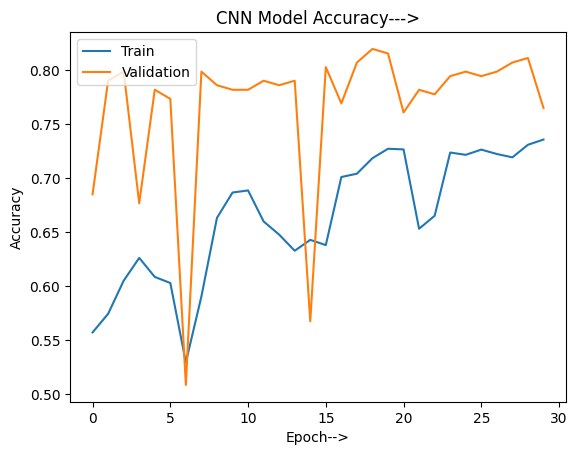

In [ ]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy--->')
plt.xlabel('Epoch-->')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<a name="cnn-model-loss"></a>
## Plot of CNN Model Loss:

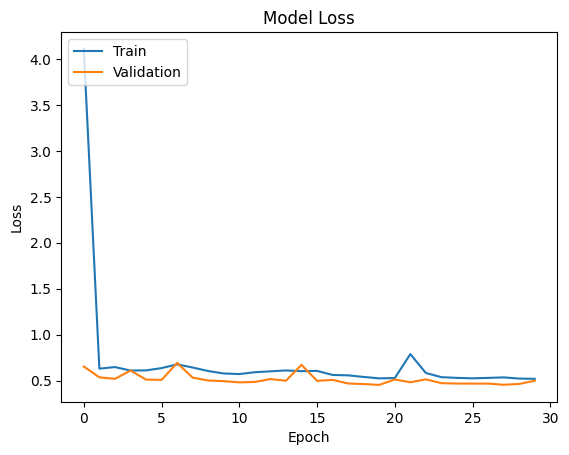

In [ ]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<a name="cnn-model-preiction"></a>

## Actual vs Label CNN Model Plot

In [ ]:
cnn_prediction=cnn_model.predict(X_eval_cnn)
cnn_predictions=(cnn_prediction > 0.5).astype(int)

8/8 [==============================] - 0s 3ms/step


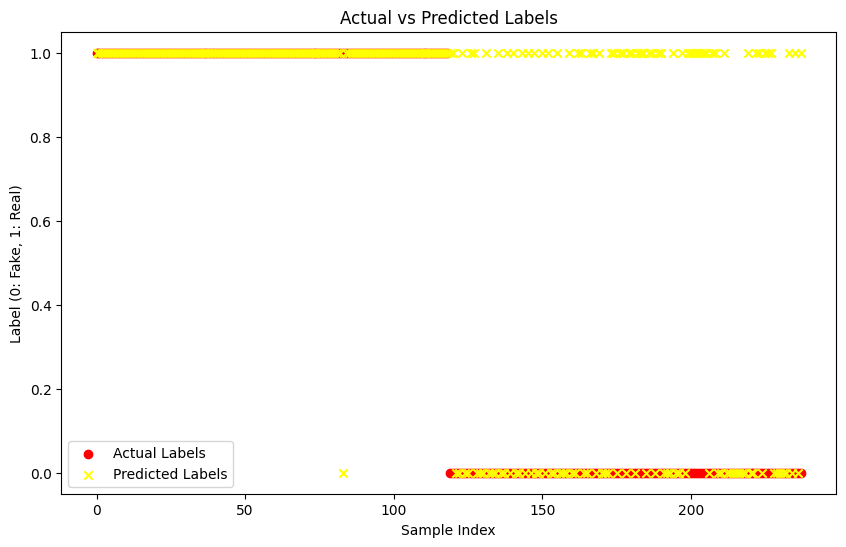

In [ ]:
predictions = cnn_predictions.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_eval)), y_eval, color='red', label='Actual Labels')
plt.scatter(range(len(predictions)), predictions, color='yellow', marker='x', label='Predicted Labels')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label (0: Fake, 1: Real)')
plt.legend()
plt.show()


<a name="cnn-model-report"></a>

## Report Of CNN Model:

In [ ]:
report = classification_report(y_eval, cnn_predictions, output_dict=True)
report_table = []
headers = ["Class","Accuracy(%)", "Precision(%)", "Recall(%)", "F1-Score(%)", "Support"]
for class_label, metrics in report.items():
    if isinstance(metrics, dict):
        report_table.append([
            class_label,
            round(metrics["precision"]*100, 2),
            round(metrics["recall"]*100, 2),
            round(metrics["f1-score"]*100, 2),
            metrics["support"]
        ])
report_table.append(["Overall Accuracy(%)", round(report["accuracy"]*100, 2), "", "", "", ""])
print(tabulate(report_table, headers=headers, tablefmt="grid"))

+---------------------+---------------+----------------+-------------+---------------+-----------+
| Class               |   Accuracy(%) | Precision(%)   | Recall(%)   | F1-Score(%)   | Support   |
+=====================+===============+================+=============+===============+===========+
| 0                   |         98.46 | 53.78          | 69.57       | 119           |           |
+---------------------+---------------+----------------+-------------+---------------+-----------+
| 1                   |         68.21 | 99.16          | 80.82       | 119           |           |
+---------------------+---------------+----------------+-------------+---------------+-----------+
| macro avg           |         83.33 | 76.47          | 75.19       | 238           |           |
+---------------------+---------------+----------------+-------------+---------------+-----------+
| weighted avg        |         83.33 | 76.47          | 75.19       | 238           |           |
+---------

-------------------------------
-------------------------------
-------------------------------

<a name="lstm-model-accuracy"></a>
## Plot of LSTM Model Accuracy:

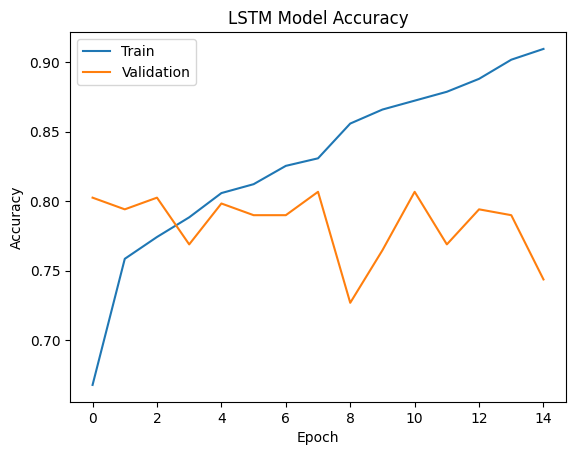

In [ ]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<a name="lstm-model-loss"></a>
## Plot of LSTM Model Loss:

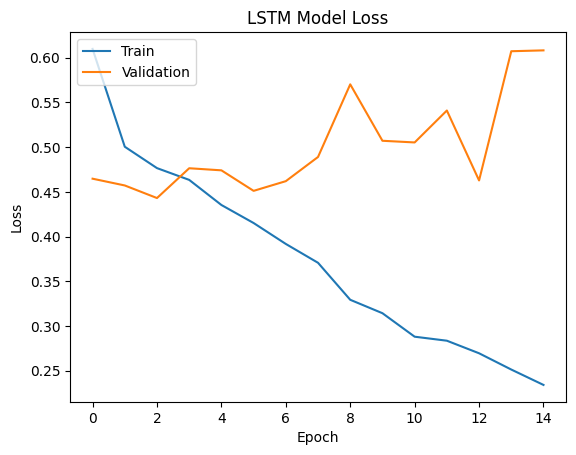

In [ ]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<a name="lstm-model-preiction"></a>

## Actual vs Label LSTM Model Plot

In [ ]:
lstm_predictions=lstm_model.predict(X_eval_lstm)
lstm_predictions = (lstm_predictions > 0.5).astype(int)

8/8 [==============================] - 1s 10ms/step


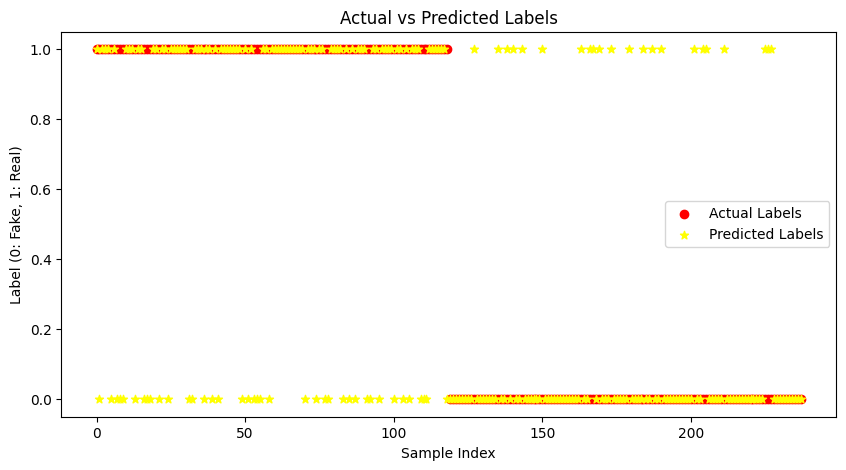

In [ ]:
predictions = lstm_predictions.flatten()
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_eval)), y_eval, color='red', label='Actual Labels')
plt.scatter(range(len(predictions)), predictions, color='yellow', marker='*', label='Predicted Labels')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label (0: Fake, 1: Real)')
plt.legend()
plt.show()

<a name="lstm-model-report"></a>

## Report Of LSTM Model:

In [ ]:
report = classification_report(y_eval, lstm_predictions, output_dict=True)
report_table = []
headers = ["Class", "Precision(%)", "Recall(%)", "F1-Score(%)", "Support"]
for class_label, metrics in report.items():
    if isinstance(metrics, dict):
        report_table.append([
            class_label,
            round(metrics["precision"]*100, 2),
            round(metrics["recall"]*100, 2),
            round(metrics["f1-score"]*100, 2),
            metrics["support"]
        ])
report_table.append(["Overall Accuracy(%)", round(report["accuracy"]*100, 2), "", "", "", ""])
print(tabulate(report_table, headers=headers, tablefmt="grid"))

+---------------------+----------------+-------------+---------------+-----------+
| Class               |   Precision(%) | Recall(%)   | F1-Score(%)   | Support   |
+=====================+================+=============+===============+===========+
| 0                   |          71.32 | 81.51       | 76.08         | 119       |
+---------------------+----------------+-------------+---------------+-----------+
| 1                   |          78.43 | 67.23       | 72.4          | 119       |
+---------------------+----------------+-------------+---------------+-----------+
| macro avg           |          74.88 | 74.37       | 74.24         | 238       |
+---------------------+----------------+-------------+---------------+-----------+
| weighted avg        |          74.88 | 74.37       | 74.24         | 238       |
+---------------------+----------------+-------------+---------------+-----------+
| Overall Accuracy(%) |          74.37 |             |               |           |
+---

Saving The LSTM Model :

In [ ]:
lstm_model.save('Deep-Fake-Audio-Detection-Model.h5')

Loading the Model:

In [ ]:
# Load the trained LSTM model
from keras.models import load_model
lstm_model = load_model('Deep-Fake-Audio-Detection-Model.h5')

In [ ]:
audio_path = '/content/BangladeshChapter_AudioShield/dagshub_storage/data/ASVspoof2019_LA_train/flac/LA_T_1138215.flac'
#f'/content/LA_E_1001320.flac'

In [ ]:
def extract_features(file_path, max_pad_len=26):
    try:
        audio_data, sr = librosa.load(file_path, sr=None)
    except Exception as e:
        print(f"Error loading audio file: {e}")
        return None
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=audio_data, sr=sr).T, axis=0)
    rmse = np.mean(librosa.feature.rms(y=audio_data).T, axis=0)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sr).T, axis=0)
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio_data, sr=sr).T, axis=0)
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio_data, sr=sr).T, axis=0)
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=audio_data).T, axis=0)
    mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=20).T, axis=0)
    features = np.hstack([chroma_stft, rmse, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfccs])
    pad_width = max_pad_len - features.shape[0]
    if pad_width > 0:
        features = np.pad(features, (0, pad_width), mode='constant')
    else:
        features = features[:max_pad_len]
    return features.reshape(1, max_pad_len, 1)

In [ ]:
bold_start = '\033[1m'
bold_end = '\033[0m'
if os.path.exists(audio_path):
    X_new = extract_features(audio_path)
    if X_new is not None:
        predictions = lstm_model.predict(X_new)
        predicted_class = np.argmax(predictions, axis=1)
        label_dict = {0: 'Fake', 1: 'Real'}
        print(f"Audio of {bold_start}{os.path.basename(audio_path)}{bold_end} Is: {bold_start}{label_dict[predicted_class[0]]}{bold_end}")
    else:
        print("Failed to preprocess audio data.")
else:
    print(f"Audio file does not exist: {audio_path}")

1/1 [==============================] - 0s 39ms/step
Audio of LA_T_1138215.flac Is: Fake


Model Depolyment:

In [ ]:
%%writefile app.py
pip install streamlit tensorflow librose pydub logging
import streamlit as st
import tensorflow as tf
import librosa
import numpy as np
from keras.models import load_model
from pydub import AudioSegment
import tempfile

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=16000)
        features = {
            'chroma_stft': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
            'rmse': np.mean(librosa.feature.rms(y=y)),
            'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
            'rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
            'zero_crossing_rate': np.mean(librosa.feature.zero_crossing_rate(y=y)),
        }
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        for i in range(1, 21):
            features[f'mfcc{i}'] = np.mean(mfcc[i-1])
        return np.array(list(features.values())).reshape(1, -1)
    except Exception as e:
        st.error(f"Error extracting features: {e}")
        return None

def convert_to_flac(uploaded_file):
    try:
        with tempfile.NamedTemporaryFile(delete=False, suffix='.flac') as temp_flac_file:
            if uploaded_file.type == "audio/flac":
                temp_flac_file.write(uploaded_file.read())
            else:
                with tempfile.NamedTemporaryFile(delete=False, suffix='.wav') as temp_wav_file:
                    temp_wav_file.write(uploaded_file.read())
                    temp_wav_file.flush()
                    audio = AudioSegment.from_file(temp_wav_file.name)
                    audio.export(temp_flac_file.name, format="flac")
            return temp_flac_file.name
    except Exception as e:
        st.error(f"Error converting to FLAC: {e}")
        return None

# Load the model
model = tf.keras.load_model('Deep-Fake-Audio-Detection-Model.h5')

# Streamlit app
st.title("DeepFake Audio Detection Model")
st.write("**Developer Name:** Muhammad Ahmed Javed")
st.write("""
Welcome to the DeepFake Audio Detection tool. This application leverages advanced deep learning techniques to determine whether an audio file is real or fake.
We experimented with two different deep learning models: **Convolutional Neural Networks (CNN)** and **Long Short-Term Memory networks (LSTM)**.
After extensive testing and evaluation, the LSTM model demonstrated superior performance in detecting deepfake audio, achieving higher accuracy and robustness.
""")

uploaded_file = st.file_uploader("Choose an audio file", type=["wav", "mp3", "flac"])

if uploaded_file:
    temp_flac_path = convert_to_flac(uploaded_file)
    if temp_flac_path:
        features = extract_features(temp_flac_path)
        if features is not None:
            prediction = model.predict(features)
            if prediction > 0.7:
                st.markdown(f"<u><b>{uploaded_file.name}</b> is: <b>Real</b></u>", unsafe_allow_html=True)
            else:
                st.markdown(f"<u><b>{uploaded_file.name}</b> is: <b>Fake</b></u>", unsafe_allow_html=True)
# LSTM Model Evaluations
st.sidebar.title("LSTM Model Evaluations")
evaluation_option = st.sidebar.selectbox(
    "Choose an evaluation metric",
    ("Select an option", "LSTM Model Report", "Actual vs Predicted Label Chart", "LSTM Model Loss", "LSTM Model Accuracy")
)

if evaluation_option == "LSTM Model Report":
    st.write("LSTM Model Report")
    st.image("lstm-model-report.png", caption="LSTM Model Report", use_column_width=True)
elif evaluation_option == "Actual vs Predicted Label Chart":
    st.image("actual-vs-predicted-label.png", caption="Actual vs Predicted Label Chart", use_column_width=True)
elif evaluation_option == "LSTM Model Loss":
    st.image("lstm-model-loss.png", caption="LSTM Model Loss", use_column_width=True)
elif evaluation_option == "LSTM Model Accuracy":
    st.image("lstm-model-accuracy.png", caption="LSTM Model Accuracy", use_column_width=True)

Overwriting app.py


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.19.37.13:8501

  Stopping...
  Stopping...


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import librosa
import numpy as np

# Function to extract features from audio file
def extract_features(file_path, max_pad_len=26):
    try:
        audio_data, sr = librosa.load(file_path, sr=None)
    except Exception as e:
        print(f"Error loading audio file: {e}")
        return None
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=audio_data, sr=sr).T, axis=0)
    rmse = np.mean(librosa.feature.rms(y=audio_data).T, axis=0)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sr).T, axis=0)
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio_data, sr=sr).T, axis=0)
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio_data, sr=sr).T, axis=0)
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=audio_data).T, axis=0)
    mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=20).T, axis=0)
    features = np.hstack([chroma_stft, rmse, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfccs])
    pad_width = max_pad_len - features.shape[0]
    if pad_width > 0:
        features = np.pad(features, (0, pad_width), mode='constant')
    else:
        features = features[:max_pad_len]
    return features.reshape(1, max_pad_len, 1)

# Load the Keras model
model = load_model("Deep-Fake-Audio-Detection-Model.h5")

# Audio file path
audio_path = "LA_E_1001320.flac"

# Extract features from audio file
X_new = extract_features(audio_path)

# Predict with the model
predictions = model.predict(X_new)
predicted_class = np.argmax(predictions, axis=-1)

# Dictionary to map class index to labels
label_dict = {0: 'Fake', 1: 'Real'}

# Print the prediction result
print(f"Audio {audio_path} is: {label_dict[predicted_class[0]]}")


1/1 [==============================] - 1s 826ms/step
Audio LA_E_1001320.flac is: Fake


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
import tensorflow as tf
print(tf.__version__)  # Print TensorFlow version, which includes Keras version

2.15.0
